In [76]:
import pandas as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
insurance_claimsdf = pd.read_csv('C:/Users/chimi/Desktop/Python Data Science Projects/insurance_claim/data/insurance_claims.csv')

In [43]:
# Shape of the dataset
insurance_claimsdf.shape

(1000, 40)

In [44]:
# Display the first few rows and summary information about the dataset
display_info = {
    'head' : insurance_claimsdf.head(),
    'info' : insurance_claimsdf.info()  
    
}
display_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

{'head':    months_as_customer  age  policy_number policy_bind_date policy_state  \
 0                 328   48         521585       2014-10-17           OH   
 1                 228   42         342868       2006-06-27           IN   
 2                 134   29         687698       2000-09-06           OH   
 3                 256   41         227811       1990-05-25           IL   
 4                 228   44         367455       2014-06-06           IL   
 
   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
 0    250/500               1000                1406.91               0   
 1    250/500               2000                1197.22         5000000   
 2    100/300               2000                1413.14         5000000   
 3    250/500               2000                1415.74         6000000   
 4   500/1000               1000                1583.91         6000000   
 
    insured_zip  ... police_report_available total_claim_amount injury_claim  \
 0

In [45]:
# Columns of the dataframe
insurance_claimsdf.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [46]:
# Check for duplicates

duplicate_rows = insurance_claimsdf.duplicated().sum()

duplicate_rows

0

In [47]:
# Check for missing values
insurance_claimsdf.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [48]:
# Check for missing values in each column
missing_values = insurance_claimsdf.isnull().sum()

missing_values[missing_values > 0]


authorities_contacted      91
_c39                     1000
dtype: int64

In [49]:
# The only column that has missing value is c39-all the 1000 rows are missing in this column
# Drop the column
insurance_claimsdf.drop('_c39', axis=1, inplace=True)

In [50]:
# Data Type correction
insurance_claimsdf['policy_bind_date'] = pd.to_datetime(insurance_claimsdf['policy_bind_date'])
insurance_claimsdf['incident_date'] = pd.to_datetime(insurance_claimsdf['incident_date'])


In [51]:
# Check to see if the categorical variables are correctly identified as categorical datatypes
insurance_claimsdf['insured_zip'] = insurance_claimsdf['insured_zip'].astype(str)
insurance_claimsdf['auto_year'] = insurance_claimsdf['auto_year'].astype(str)

insurance_claimsdf[['insured_zip','auto_year']].dtypes

insured_zip    object
auto_year      object
dtype: object

In [52]:
insurance_claimsdf['policy_age_at_incident'] = (insurance_claimsdf['incident_date'] - insurance_claimsdf['policy_bind_date']).dt.days

In [53]:
# Import labelEncoder
from sklearn.preprocessing import LabelEncoder


In [54]:
# Encode binary categorical variables

binary_columns = ['insured_sex','police_report_available','property_damage','fraud_reported']


# Encode binary categorical variable

label_encoders = {}

for col in binary_columns:
    le = LabelEncoder()
    insurance_claimsdf[col] = le.fit_transform(insurance_claimsdf[col].apply(lambda x: 'Unknown' if x == '?' else x))
    label_encoders[col] = le
    
# Display the changes and check the encoded columns
insurance_claimsdf[['policy_bind_date', 'incident_date', 'insured_sex', 'police_report_available', 'property_damage', 'fraud_reported']].head(), insurance_claimsdf.dtypes


(  policy_bind_date incident_date  insured_sex  police_report_available  \
 0       2014-10-17    2015-01-25            1                        2   
 1       2006-06-27    2015-01-21            1                        1   
 2       2000-09-06    2015-02-22            0                        0   
 3       1990-05-25    2015-01-10            0                        0   
 4       2014-06-06    2015-02-17            1                        0   
 
    property_damage  fraud_reported  
 0                2               1  
 1                1               1  
 2                0               0  
 3                1               1  
 4                0               0  ,
 months_as_customer                      int64
 age                                     int64
 policy_number                           int64
 policy_bind_date               datetime64[ns]
 policy_state                           object
 policy_csl                             object
 policy_deductable                   

In [55]:
# Extract temporal features 
insurance_claimsdf['policy_bind_year'] = insurance_claimsdf['policy_bind_date'].dt.year
insurance_claimsdf['policy_bind_weekday'] = insurance_claimsdf['policy_bind_date'].dt.month
insurance_claimsdf['policy_bind_weekday'] = insurance_claimsdf['policy_bind_date'].dt.weekday
insurance_claimsdf['incident_year'] = insurance_claimsdf['incident_date'].dt.year
insurance_claimsdf['incident_month'] = insurance_claimsdf['incident_date'].dt.month
insurance_claimsdf['incident_weekday'] = insurance_claimsdf['incident_date'].dt.weekday

In [56]:
# Encode other variables

multi_label_categoricals = [
    'policy_state', 'policy_csl', 'insured_education_level', 'insured_occupation', 
    'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 
    'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 
    'auto_make'
]

# Initialize dictionary to store label encoders
label_encoders = {}

# Encode other variables
for col in multi_label_categoricals:
    le = LabelEncoder()
    insurance_claimsdf[col] = le.fit_transform(insurance_claimsdf[col])
    label_encoders[col] = le

# Creating Claims Severity Indicator
# Make sure to use 'insurance_claimsdf' consistently if this is the correct DataFrame
insurance_claimsdf['claims_severity'] = insurance_claimsdf['total_claim_amount'] + \
                                        insurance_claimsdf['bodily_injuries']*1000 + \
                                        insurance_claimsdf['property_damage']*100

# Binning incident hour into time of day categories
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
insurance_claimsdf['incident_time_of_day'] = pd.cut(insurance_claimsdf['incident_hour_of_the_day'], bins=bins, labels=labels, right=False)

# Encoding the new time of day category
insurance_claimsdf['incident_time_of_day'] = LabelEncoder().fit_transform(insurance_claimsdf['incident_time_of_day'])

# Reviewing the dataset with new features
insurance_claimsdf.head(5)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_year,fraud_reported,policy_age_at_incident,policy_bind_year,policy_bind_weekday,incident_year,incident_month,incident_weekday,claims_severity,incident_time_of_day
0,328,48,521585,2014-10-17,2,1,1000,1406.91,0,466132,...,2004,1,100,2014,4,2015,1,6,72810,3
1,228,42,342868,2006-06-27,1,1,2000,1197.22,5000000,468176,...,2007,1,3130,2006,1,2015,1,2,5170,2
2,134,29,687698,2000-09-06,2,0,2000,1413.14,5000000,430632,...,2007,0,5282,2000,2,2015,2,6,36650,2
3,256,41,227811,1990-05-25,0,1,2000,1415.74,6000000,608117,...,2014,1,8996,1990,4,2015,1,5,64500,3
4,228,44,367455,2014-06-06,0,2,1000,1583.91,6000000,610706,...,2009,0,256,2014,4,2015,2,1,6500,1


In [57]:
# Drop some of the not needed columns
columns_to_drop = ['policy_number','policy_bind_date','insured_zip','incident_date','auto_model','incident_location']
insurance_claimsdf.drop(columns_to_drop, axis=1, inplace=True)

#### Accomplishing First Objective using Clustering:

- The purpose of this project is to determine which policyholders, based on their policy interaction history, policy details and claim history are likely to have a favorable experience.The goal is be able to make a model that can actively proactively provide individualized services.

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\Users\chimi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chimi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chimi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chimi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

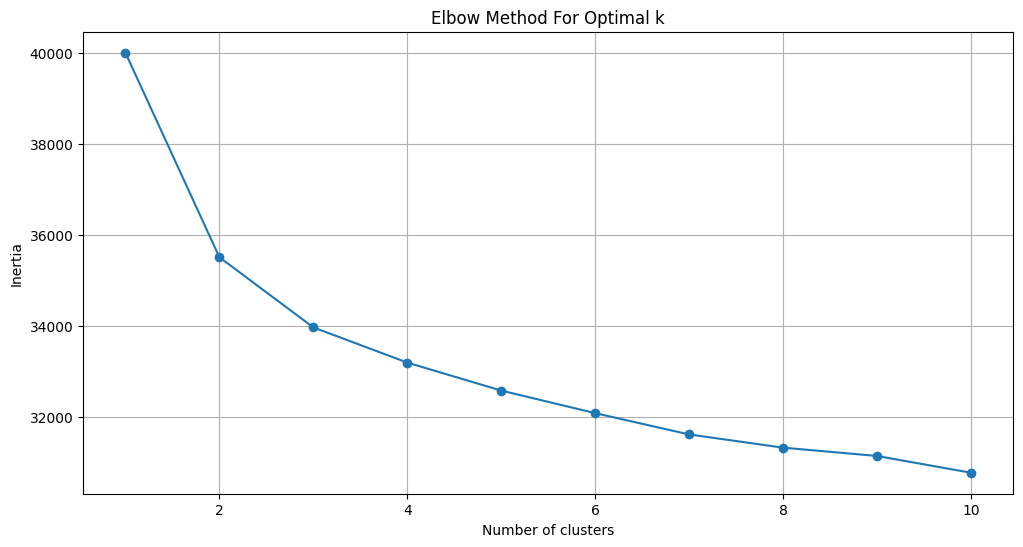

In [59]:
# Standardizing the data

def clustering(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    
    # Determine the optimal number of clusters using the elbow method
    inertia = []  # Corrected the variable name here
    
    k_range = range(1, 11)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        inertia.append(kmeans.inertia_)  # Corrected the attribute access here with an underscore
    
    # Plot the figure
    plt.figure(figsize=(12, 6))
    plt.plot(k_range, inertia, marker='o')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()


clustering(insurance_claimsdf)


#### Observation:
- Looking at the elbow method, it looks like the optimal number of k-clusters is 2 or 3.

### DBSCAN

In [60]:
from sklearn.cluster import DBSCAN

In [61]:
# Scale the dataset
# make a copy of the dataset
insurance_claimsdf1 = insurance_claimsdf.copy()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(insurance_claimsdf1)

In [62]:
# Applying DBSCAN with initially chosen parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Number of clusters formed and noise points
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
noise_points = list(dbscan_labels).count(-1)

n_clusters_dbscan, noise_points

(0, 1000)

In [63]:
# Trying different values of eps while keeping min_samples the same
eps_values = [0.5, 1.0, 1.5, 2.0]  # Increasing eps values
dbscan_results = {}

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(scaled_data)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise = list(labels).count(-1)
    dbscan_results[eps] = {'clusters': n_clusters, 'noise_points': noise}

dbscan_results

{0.5: {'clusters': 0, 'noise_points': 1000},
 1.0: {'clusters': 0, 'noise_points': 1000},
 1.5: {'clusters': 0, 'noise_points': 1000},
 2.0: {'clusters': 0, 'noise_points': 1000}}

#### Observations:
These results suggest that, given the current data attributes and parameter range, raising the parameter up to 2.0 still results in all points being classified as noise, suggesting that DBSCAN is not producing clusters in this instance. This may occur in datasets when the data point density is either too scattered or too uniform for DBSCAN's default settings to detect clusters accurately. Considering Hierarchical Clustering could be beneficial in light of these results.

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage

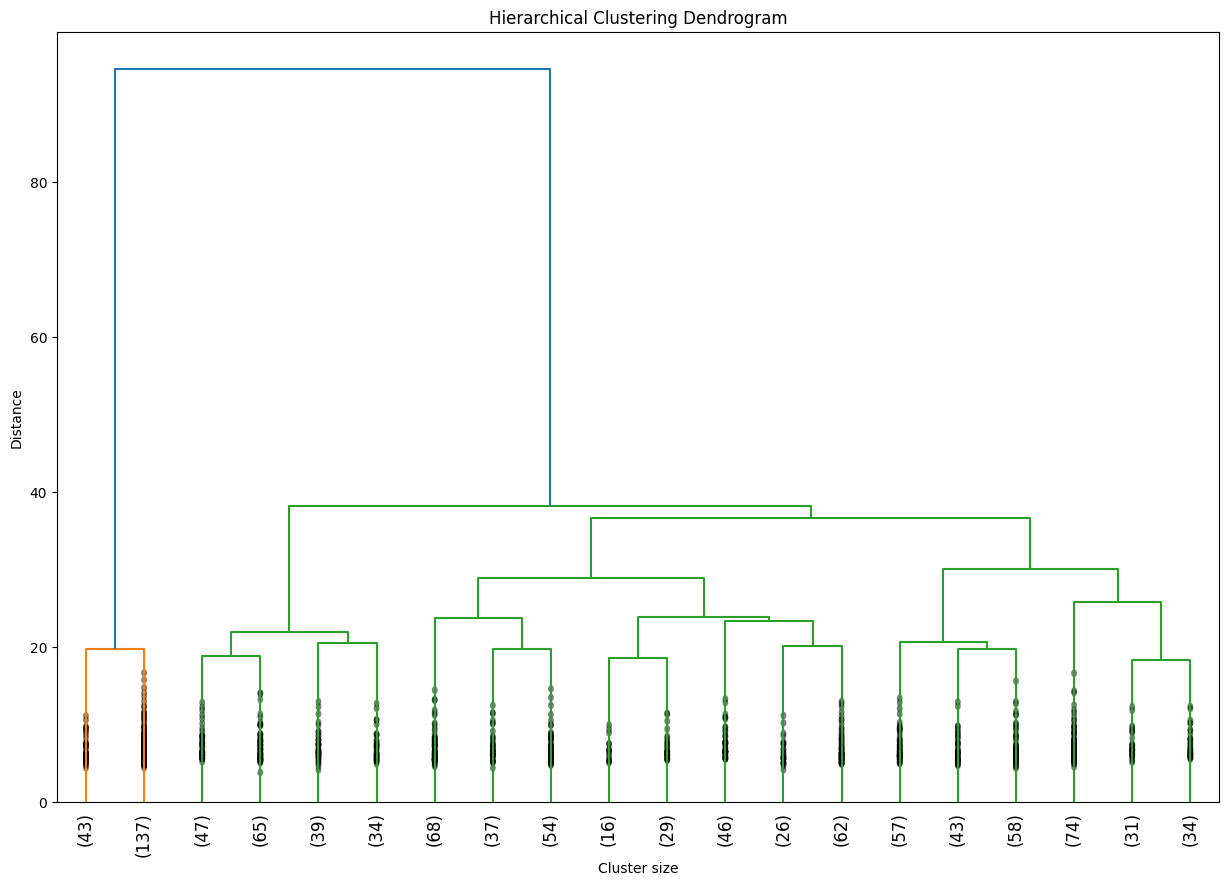

In [65]:
# Applying Hierarchical Clustering
linked = linkage(scaled_data, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linked,
           truncate_mode='lastp',  # show only the last p merged clusters
           p=20,  # show only the last 20 merged clusters
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

### Observations:
- The dendogram displays displays when there is a large jump in distance between the points there are less similar to each other. While, they are close together, they are more similar to each other. 

##### Picking the best the model:
- K-Means
- DBSCAN - Due to presence too many noises, DBSCAN will not be used to model our dataset.
- Hierarichal Cluster- 

In [66]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster back into the original df
insurance_claimsdf['cluster'] = clusters

C:\Users\chimi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [67]:
# Preview the cluster dataset
insurance_claimsdf.head(5)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,fraud_reported,policy_age_at_incident,policy_bind_year,policy_bind_weekday,incident_year,incident_month,incident_weekday,claims_severity,incident_time_of_day,cluster
0,328,48,2,1,1000,1406.91,0,1,4,2,...,1,100,2014,4,2015,1,6,72810,3,0
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,1,3130,2006,1,2015,1,2,5170,2,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,0,5282,2000,2,2015,2,6,36650,2,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,1,8996,1990,4,2015,1,5,64500,3,0
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,0,256,2014,4,2015,2,1,6500,1,1


In [68]:
# Looking at the centroids of the the clusters
centroids = kmeans.cluster_centers_
print(centroids)

[[ 2.23521082e-02  2.13866506e-02  5.27648244e-03 -3.81250301e-02
   8.06361325e-03  1.43122749e-04 -2.21033136e-02 -4.44355571e-03
   2.31213817e-02  3.40217545e-03 -1.15599329e-02 -8.35587077e-03
   1.74862142e-02 -1.04592229e-02 -1.81796482e-01  3.42954505e-01
  -1.94601366e-01 -2.84845902e-01 -3.66658073e-02  1.64578774e-03
   1.26201268e-01  1.83366709e-01  1.28438934e-02  6.76943316e-03
   6.70788459e-04  2.36977968e-02  3.96778244e-01  3.03680066e-01
   3.07415133e-01  3.97649677e-01 -1.29257084e-02 -1.57032913e-02
   8.36796165e-02 -1.88884766e-02  1.88463398e-02  2.27710577e-02
   0.00000000e+00 -4.06440485e-03  2.21191620e-02  3.96185586e-01
  -1.34521383e-01]
 [-9.91267406e-02 -9.48451459e-02 -2.34000526e-02  1.69076220e-01
  -3.57603718e-02 -6.34718277e-04  9.80233907e-02  1.97062036e-02
  -1.02538301e-01 -1.50879085e-02  5.12657894e-02  3.70564704e-02
  -7.75475586e-02  4.63843796e-02  8.06227876e-01 -1.52092867e+00
   8.63014756e-01  1.26322965e+00  1.62604885e-01 -7.2987

In [69]:
# Calculate means values for each cluster

# Select columns with numeric data types
num_cols = insurance_claimsdf.select_dtypes(include=['number'])

# Calculate the mean of these columns grouped by 'cluster'
cluster_means = num_cols.groupby('cluster').mean()

print(cluster_means)

         months_as_customer        age  policy_state  policy_csl  \
cluster                                                            
0                206.525735  39.143382      1.018382    0.920343   
1                192.548913  38.081522      0.994565    1.086957   

         policy_deductable  policy_annual_premium  umbrella_limit  \
cluster                                                             
0              1140.931373            1256.441078    1.050245e+06   
1              1114.130435            1256.251250    1.326087e+06   

         insured_sex  insured_education_level  insured_occupation  ...  \
cluster                                                            ...   
0           0.460784                 3.011029            6.666667  ...   
1           0.472826                 2.766304            6.592391  ...   

         auto_make  fraud_reported  policy_age_at_incident  policy_bind_year  \
cluster                                                                  

#### Using the months_as_customer average to classify whether a customer had positive experience or negative experience

-  Justification: We will be using months_as_customer to classify whether a customer had a positive interaction or negative interaction with this insurance company.- 
- B/c the longevity of a customer translates to positive interaction. The longer a customer is with the company, the more satisfied they will likely be based on the loyalty factor. 

In [73]:
# Using customer's average tenure to label customer's experience
map_values = {0 :'Positive', 1:'Negative'}

insurance_claimsdf['customer_interaction'] = insurance_claimsdf['cluster'].map(map_values)

In [74]:
# How many positive or negative interaction?
insurance_claimsdf['customer_interaction'].value_counts()

customer_interaction
Positive    816
Negative    184
Name: count, dtype: int64

C:\Users\chimi\AppData\Local\Temp\ipykernel_14756\1187179159.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='customer_interaction', data=insurance_claimsdf, palette='viridis')


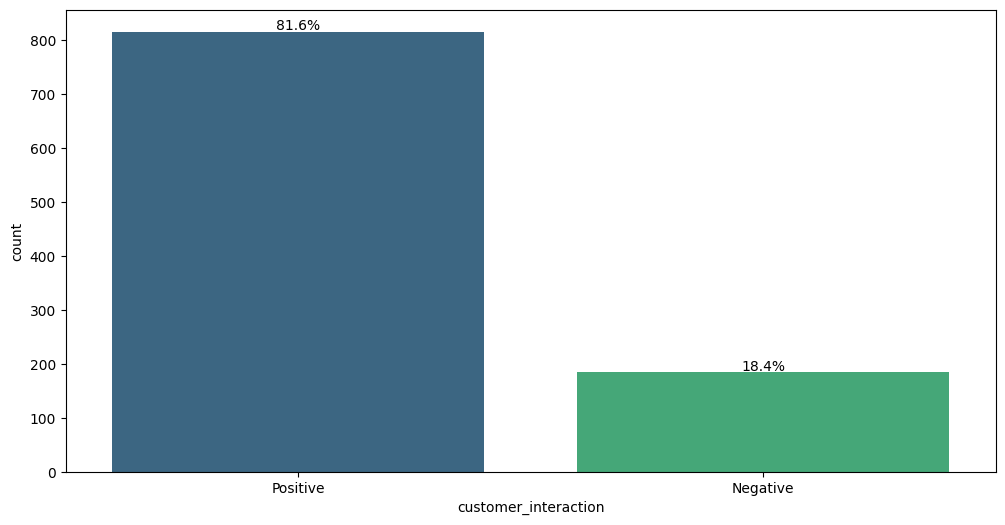

In [77]:
# Visualization

# Create the plot
plt.figure(figsize=(12,6))
ax = sns.countplot(x='customer_interaction', data=insurance_claimsdf, palette='viridis')

# Calculate the total number of entries in the data (for percentage calculation)
total = len(insurance_claimsdf['customer_interaction'])

# Get the current plot's bars and their locations
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar (which is the count of each category)
    percentage = '{:.1f}%'.format(100 * height/total)  # Calculate the percentage of each bar
    ax.text(p.get_x() + p.get_width()/2., height + 3, percentage, ha="center")  # Place the text at the top of the bar

plt.show()

In [78]:
# Out of the 18% disatisfied customer, how many of them are labeled as negative?
# Exploring fraud and  negative experience

negative_subset_data = insurance_claimsdf[insurance_claimsdf['customer_interaction'] == 'Negative']

# Calculate % of fraud within this subset
percent_fraud = negative_subset_data['fraud_reported'].value_counts() / len(negative_subset_data) * 100

#
map_values = {0:'Non-Fraud', 1:'Fraud'}

# Map the series used to the provided valies
percent_fraud.index = percent_fraud.index.map(map_values)


# Convert the series to a DataFrame
percent_fraud = percent_fraud.reset_index()
percent_fraud.columns = ['Fraud_Status', 'Percentage']

# Display the dataframe
percent_fraud

,Fraud_Status,Percentage
0,Non-Fraud,91.304348
1,Fraud,8.695652
